In [1]:
import pandas as pd
import numpy as np
from ast import literal_eval
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from shapely.geometry import Point

In [2]:
# Read the Excel file


df = pd.read_excel("C:/Users/Admin/OneDrive - Sol Plaatje University/Documents/data science second year/DATATHON PROJECT/Challange 1 datathon/Tierkloof9bAirTempActualDatathon.xlsx")


In [3]:
df.head()

,DateTime,Temperature_Celsius,Comment
0,2011-06-20T12:15:00.0000000+02:00,21.47,For calibrationSuspect temperature reading due...
1,2011-06-20T13:15:00.0000000+02:00,21.28,Suspect temperature reading due to no radiatio...
2,2011-06-20T14:15:00.0000000+02:00,24.45,Suspect temperature reading due to no radiatio...
3,2011-06-20T15:15:00.0000000+02:00,24.16,Suspect temperature reading due to no radiatio...
4,2011-06-20T16:15:00.0000000+02:00,20.71,Suspect temperature reading due to no radiatio...


"Suspect temperature reading due to no radiation shield": This comment indicates that certain temperature readings may be unreliable because they lack radiation shielding. Radiation shielding is crucial in temperature measurement to avoid external radiation influences, like solar radiation, which can cause temperature readings to be artificially high. These entries could represent data points that might need exclusion or special treatment in analysis, as they could skew results due to potential inaccuracy.

"For calibration": This suggests that certain readings are marked for calibration purposes. Calibration data can be used to adjust and validate the accuracy of the measurement system, serving as reference points to correct or adjust other readings.

In [4]:

# Filter rows containing specific phrases
calibration_rows = df[df['Comment'].str.contains('For calibration', na=False)]
suspect_rows = df[df['Comment'].str.contains('Suspect temperature reading due to no radiation shield', na=False)]


In [5]:
calibration_rows

,DateTime,Temperature_Celsius,Comment
0,2011-06-20T12:15:00.0000000+02:00,21.47,For calibrationSuspect temperature reading due...
53,2011-06-22T16:45:16.0000000+02:00,NaN,For calibration
54,2011-06-22T16:50:12.0000000+02:00,NaN,For calibration
55,2011-06-22T16:52:57.0000000+02:00,NaN,For calibration
56,2011-06-22T16:53:37.0000000+02:00,NaN,For calibration
...,...,...,...
180782,2024-08-28T09:36:12.0000000+02:00,NaN,For calibration
180786,2024-08-28T12:21:27.0000000+02:00,NaN,For calibration
180795,2024-08-28T20:10:00.0000000+02:00,NaN,For calibration
180796,2024-08-28T20:39:36.0000000+02:00,NaN,For calibration


In [6]:
suspect_rows

,DateTime,Temperature_Celsius,Comment
0,2011-06-20T12:15:00.0000000+02:00,21.470,For calibrationSuspect temperature reading due...
1,2011-06-20T13:15:00.0000000+02:00,21.280,Suspect temperature reading due to no radiatio...
2,2011-06-20T14:15:00.0000000+02:00,24.450,Suspect temperature reading due to no radiatio...
3,2011-06-20T15:15:00.0000000+02:00,24.160,Suspect temperature reading due to no radiatio...
4,2011-06-20T16:15:00.0000000+02:00,20.710,Suspect temperature reading due to no radiatio...
...,...,...,...
9535,2012-04-02T19:00:00.0000000+02:00,14.613,Suspect temperature reading due to no radiatio...
9536,2012-04-02T20:00:00.0000000+02:00,12.883,Suspect temperature reading due to no radiatio...
9537,2012-04-02T21:00:00.0000000+02:00,12.497,Suspect temperature reading due to no radiatio...
9538,2012-04-02T22:00:00.0000000+02:00,12.304,Suspect temperature reading due to no radiatio...


In [7]:

# Convert DateTime to date only
df['Date'] = pd.to_datetime(df['DateTime']).dt.date

# Group by date and find min/max temperatures
daily_stats = df.groupby('Date').agg({
    'Temperature_Celsius': ['min', 'max']
}).reset_index()

# Get comments for min and max temperatures for each date
def get_temp_comments(group):
    min_temp_idx = group['Temperature_Celsius'].idxmin()
    max_temp_idx = group['Temperature_Celsius'].idxmax()
    return pd.Series({
        'min_temp_comment': group.loc[min_temp_idx, 'Comment'],
        'max_temp_comment': group.loc[max_temp_idx, 'Comment']
    })

comments = df.groupby('Date').apply(get_temp_comments).reset_index()

# Merge temperature stats with comments
result = pd.merge(daily_stats, comments, on='Date')

# Rename columns for clarity
result.columns = ['Date', 'Min_Temp', 'Max_Temp', 'Min_Temp_Comment', 'Max_Temp_Comment']

# Save to new Excel file
result.to_excel('daily_temperature_summary.xlsx', index=False)


C:\Users\Admin\AppData\Local\Temp\ipykernel_13964\1366371427.py:21: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (2 levels on the left, 1 on the right)
  result = pd.merge(daily_stats, comments, on='Date')


ValueError: Length mismatch: Expected axis has 6 elements, new values have 5 elements

In [8]:
# Flatten the multi-level column index in daily_stats
daily_stats.columns = ['Date', 'Min_Temp', 'Max_Temp']

# Merge temperature stats with comments again
result = pd.merge(daily_stats, comments, on='Date')

# Save to new Excel file
result.to_excel('daily_temperature_summary.xlsx', index=False)

# Display the results
print(result.head())

         Date  Min_Temp  Max_Temp  \
0  2011-06-20     2.410    24.450   
1  2011-06-21     1.330    30.360   
2  2011-06-22     6.880    15.570   
3  2011-06-23     7.582    18.521   
4  2011-06-24     7.280    16.046   

                                    min_temp_comment  \
0  Suspect temperature reading due to no radiatio...   
1  Suspect temperature reading due to no radiatio...   
2  Suspect temperature reading due to no radiatio...   
3  Suspect temperature reading due to no radiatio...   
4  Suspect temperature reading due to no radiatio...   

                                    max_temp_comment  
0  Suspect temperature reading due to no radiatio...  
1  Suspect temperature reading due to no radiatio...  
2  Suspect temperature reading due to no radiatio...  
3  Suspect temperature reading due to no radiatio...  
4  Suspect temperature reading due to no radiatio...  


In [9]:
data= pd.read_excel("C:/Users/Admin/OneDrive - Sol Plaatje University/Documents/data science second year/DATATHON PROJECT/Challange 1 datathon/daily_temperature_summary.xlsx")

In [10]:
data.head()

,Date,Min_Temp,Max_Temp,min_temp_comment,max_temp_comment
0,2011-06-20,2.410,24.450,Suspect temperature reading due to no radiatio...,Suspect temperature reading due to no radiatio...
1,2011-06-21,1.330,30.360,Suspect temperature reading due to no radiatio...,Suspect temperature reading due to no radiatio...
2,2011-06-22,6.880,15.570,Suspect temperature reading due to no radiatio...,Suspect temperature reading due to no radiatio...
3,2011-06-23,7.582,18.521,Suspect temperature reading due to no radiatio...,Suspect temperature reading due to no radiatio...
4,2011-06-24,7.280,16.046,Suspect temperature reading due to no radiatio...,Suspect temperature reading due to no radiatio...


In [11]:
# Feature Engineering
data['temp_range'] = data['Max_Temp'] - data['Min_Temp']
data['avg_temp'] = (data['Max_Temp'] + data['Min_Temp']) / 2
data['month'] = data['Date'].dt.month
data['day_of_week'] = data['Date'].dt.day_name()
data['is_weekend'] = data['day_of_week'].isin(['Saturday', 'Sunday']).astype(int)

In [12]:
data.head()

,Date,Min_Temp,Max_Temp,min_temp_comment,max_temp_comment,temp_range,avg_temp,month,day_of_week,is_weekend
0,2011-06-20,2.410,24.450,Suspect temperature reading due to no radiatio...,Suspect temperature reading due to no radiatio...,22.040,13.4300,6,Monday,0
1,2011-06-21,1.330,30.360,Suspect temperature reading due to no radiatio...,Suspect temperature reading due to no radiatio...,29.030,15.8450,6,Tuesday,0
2,2011-06-22,6.880,15.570,Suspect temperature reading due to no radiatio...,Suspect temperature reading due to no radiatio...,8.690,11.2250,6,Wednesday,0
3,2011-06-23,7.582,18.521,Suspect temperature reading due to no radiatio...,Suspect temperature reading due to no radiatio...,10.939,13.0515,6,Thursday,0
4,2011-06-24,7.280,16.046,Suspect temperature reading due to no radiatio...,Suspect temperature reading due to no radiatio...,8.766,11.6630,6,Friday,0


In [13]:
data.columns

Index(['Date', 'Min_Temp', 'Max_Temp', 'min_temp_comment', 'max_temp_comment',
       'temp_range', 'avg_temp', 'month', 'day_of_week', 'is_weekend'],
      dtype='object')

In [14]:
data['temp_category'] = pd.cut(
    data['avg_temp'], 
    bins=[-float('inf'), 10, 20, 30, float('inf')], 
    labels=['Cold', 'Mild', 'Warm', 'Hot']
)

In [15]:
# Define seasons based on months
def get_season(month):
    if month in [12, 1, 2]:
        return 'Summer'
    elif month in [3, 4, 5]:
        return 'Autumn'
    elif month in [6, 7, 8]:
        return 'Winter'
    elif month in [9, 10, 11]:
        return 'Spring'

# Apply the season function to create a new column
data['season'] = data['month'].apply(get_season)

# Categorize temperature
data['temp_category'] = pd.cut(
    data['avg_temp'], 
    bins=[-float('inf'), 10, 20, 30, float('inf')], 
    labels=['Cold', 'Mild', 'Warm', 'Hot']
)

In [16]:
d1 = pd.DataFrame(data)

# Convert the Date column to datetime format
d1['Date'] = pd.to_datetime(d1['Date'])

# Extract the year from the Date column and add it as a new column
d1['year'] = d1['Date'].dt.year

In [17]:
d1= data

In [18]:
data['avg_temp'] = pd.to_numeric(data['avg_temp'], errors='coerce')

In [19]:
data.head()

,Date,Min_Temp,Max_Temp,min_temp_comment,max_temp_comment,temp_range,avg_temp,month,day_of_week,is_weekend,temp_category,season,year
0,2011-06-20,2.410,24.450,Suspect temperature reading due to no radiatio...,Suspect temperature reading due to no radiatio...,22.040,13.4300,6,Monday,0,Mild,Winter,2011
1,2011-06-21,1.330,30.360,Suspect temperature reading due to no radiatio...,Suspect temperature reading due to no radiatio...,29.030,15.8450,6,Tuesday,0,Mild,Winter,2011
2,2011-06-22,6.880,15.570,Suspect temperature reading due to no radiatio...,Suspect temperature reading due to no radiatio...,8.690,11.2250,6,Wednesday,0,Mild,Winter,2011
3,2011-06-23,7.582,18.521,Suspect temperature reading due to no radiatio...,Suspect temperature reading due to no radiatio...,10.939,13.0515,6,Thursday,0,Mild,Winter,2011
4,2011-06-24,7.280,16.046,Suspect temperature reading due to no radiatio...,Suspect temperature reading due to no radiatio...,8.766,11.6630,6,Friday,0,Mild,Winter,2011


In [20]:
data.to_csv("SA_New.csv",index=False)
print("data saved")

data saved


In [21]:
data.to_excel("SA_New.xlsx",index=False)
print("data saved")

data saved


In [22]:
documentation = {
    'Date': 'The date of the temperature recording.',
    'Min_Temp': 'The minimum temperature recorded on the given date.',
    'Max_Temp': 'The maximum temperature recorded on the given date.',
    'min_temp_comment': 'Comments regarding the minimum temperature reading, often indicating if it is suspect.',
    'max_temp_comment': 'Comments regarding the maximum temperature reading, often indicating if it is suspect.',
    'temp_range': 'The difference between the maximum and minimum temperatures for the day.',
    'avg_temp': 'The average of the maximum and minimum temperatures for the day.',
    'month': 'The month extracted from the date.',
    'day_of_week': 'The day of the week extracted from the date.',
    'is_weekend': 'A binary indicator (1 or 0) of whether the day is a weekend.',
    'temp_category': 'Categorical label for the average temperature (Cold, Mild, Warm, Hot).',
    'is_suspicious': 'A binary indicator (1 or 0) of whether the temperature reading is flagged as suspicious.',
    'season': 'The season of the year based on the month (Winter, Spring, Summer, Fall).'
}

# Display the documentation
for column, description in documentation.items():
    print(f"{column}: {description}")

Date: The date of the temperature recording.
Min_Temp: The minimum temperature recorded on the given date.
Max_Temp: The maximum temperature recorded on the given date.
min_temp_comment: Comments regarding the minimum temperature reading, often indicating if it is suspect.
max_temp_comment: Comments regarding the maximum temperature reading, often indicating if it is suspect.
temp_range: The difference between the maximum and minimum temperatures for the day.
avg_temp: The average of the maximum and minimum temperatures for the day.
month: The month extracted from the date.
day_of_week: The day of the week extracted from the date.
is_weekend: A binary indicator (1 or 0) of whether the day is a weekend.
temp_category: Categorical label for the average temperature (Cold, Mild, Warm, Hot).
is_suspicious: A binary indicator (1 or 0) of whether the temperature reading is flagged as suspicious.
season: The season of the year based on the month (Winter, Spring, Summer, Fall).


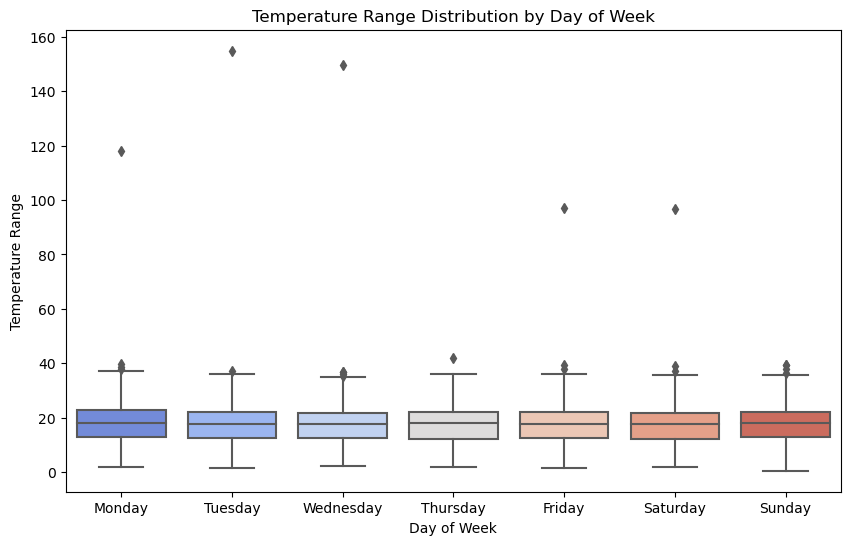

In [23]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='day_of_week', y='temp_range', palette='coolwarm')
plt.title('Temperature Range Distribution by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Temperature Range')
plt.show()


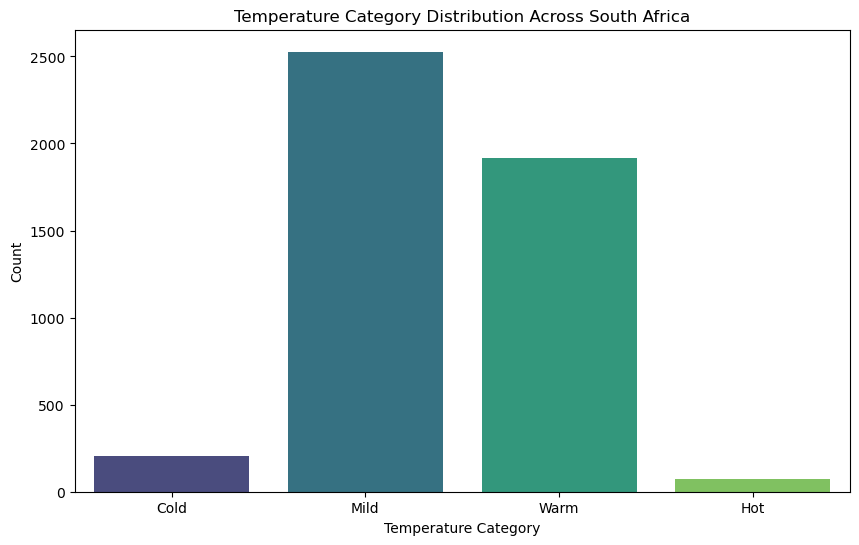

In [26]:
# Count temperature categories by region
temp_category_counts = data["temp_category"].value_counts()

# Bar plot for temperature categories
plt.figure(figsize=(10, 6))
sns.barplot(x=temp_category_counts.index, y=temp_category_counts.values, palette="viridis")
plt.title("Temperature Category Distribution Across South Africa")
plt.xlabel("Temperature Category")
plt.ylabel("Count")
plt.show()


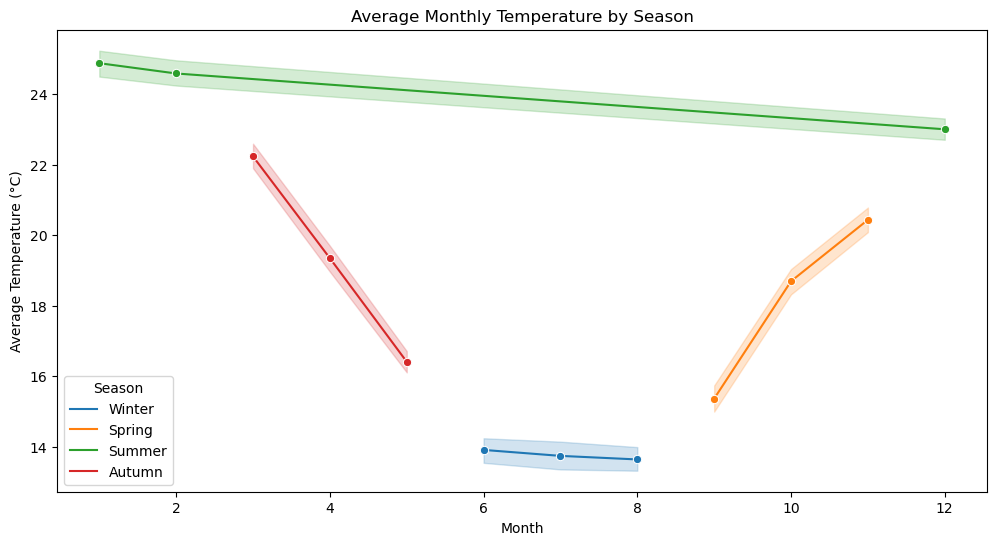

In [31]:
import seaborn as sns

# Plot average temperature by month
plt.figure(figsize=(12, 6))
sns.lineplot(data=data, x="month", y="avg_temp", hue="season", marker="o")
plt.title("Average Monthly Temperature by Season")
plt.xlabel("Month")
plt.ylabel("Average Temperature (°C)")
plt.legend(title="Season")
plt.show()


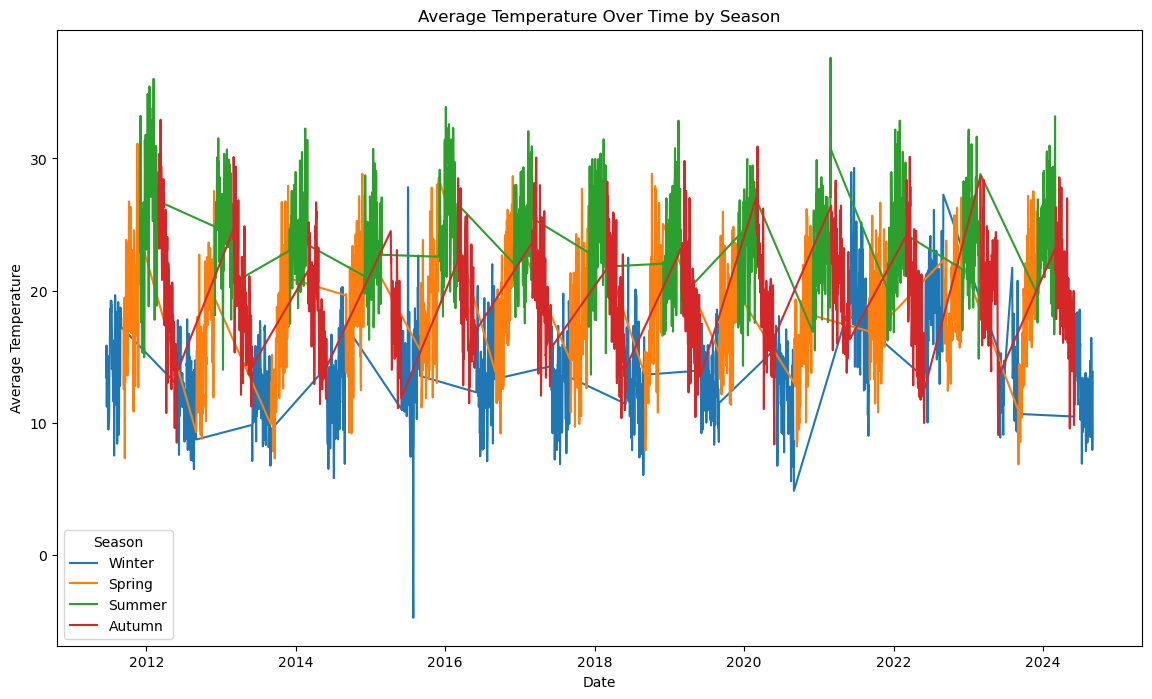

In [30]:
import seaborn as sns

plt.figure(figsize=(14, 8))
sns.lineplot(data=data, x='Date', y='avg_temp', hue='season')
plt.title('Average Temperature Over Time by Season')
plt.xlabel('Date')
plt.ylabel('Average Temperature')
plt.legend(title='Season')
plt.show()


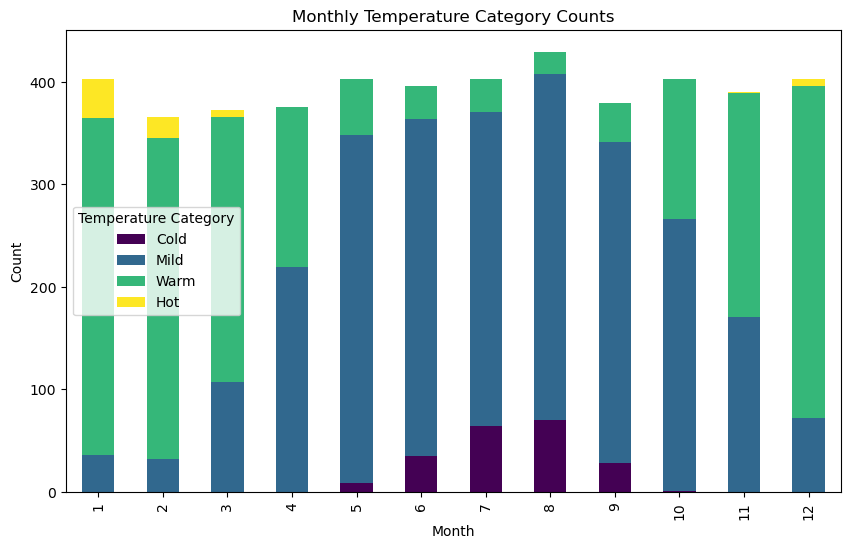

In [34]:
# Create a pivot table to count temp categories by month
temp_pivot = data.pivot_table(index='month', columns='temp_category', aggfunc='size', fill_value=0)

# Plot stacked bar chart
temp_pivot.plot(kind='bar', stacked=True, colormap='viridis', figsize=(10, 6))
plt.title('Monthly Temperature Category Counts')
plt.xlabel('Month')
plt.ylabel('Count')
plt.legend(title='Temperature Category')
plt.show()


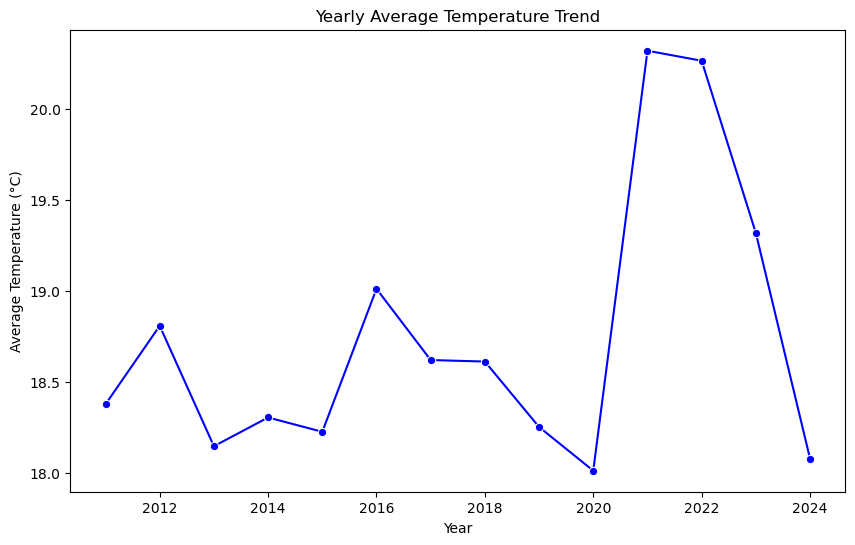

In [41]:
# Calculate yearly average temperature
yearly_avg_temp = data.groupby('year')['avg_temp'].mean().reset_index()

# Plot yearly average temperature trend
plt.figure(figsize=(10, 6))
sns.lineplot(data=yearly_avg_temp, x='year', y='avg_temp', marker='o', color='b')
plt.title('Yearly Average Temperature Trend')
plt.xlabel('Year')
plt.ylabel('Average Temperature (°C)')
plt.show()


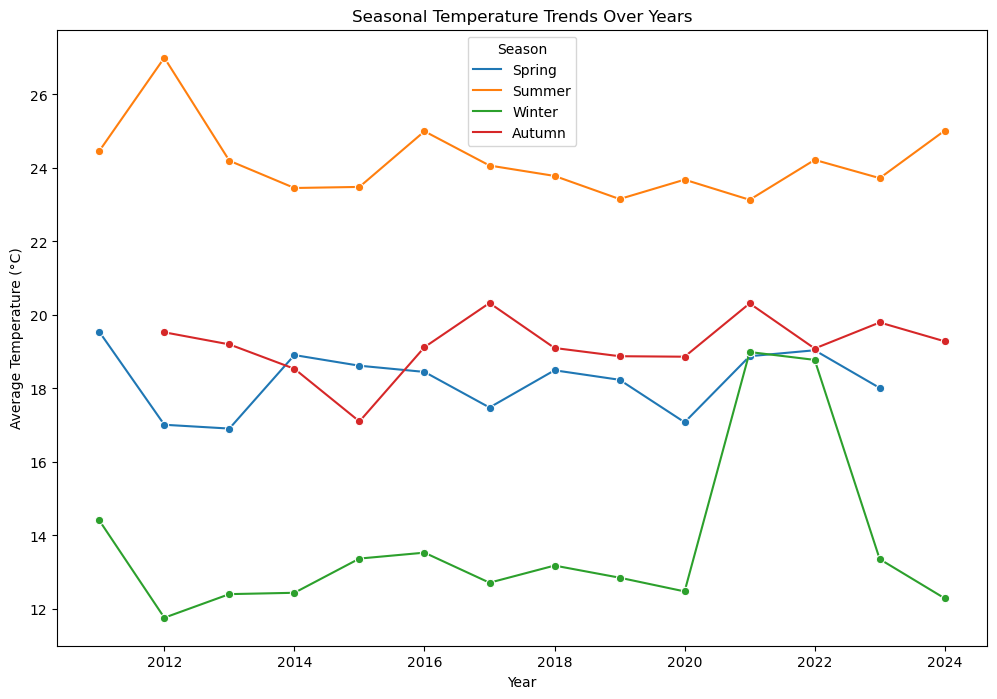

In [42]:
# Calculate average temperature per season per year
seasonal_avg_temp = data.groupby(['year', 'season'])['avg_temp'].mean().reset_index()

# Plot seasonal temperature trends over years
plt.figure(figsize=(12, 8))
sns.lineplot(data=seasonal_avg_temp, x='year', y='avg_temp', hue='season', marker='o')
plt.title('Seasonal Temperature Trends Over Years')
plt.xlabel('Year')
plt.ylabel('Average Temperature (°C)')
plt.legend(title='Season')
plt.show()
